In [51]:
#importing packages
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import seaborn as sns
from highlight_text import HighlightText, ax_text, fig_text

In [52]:
#importing data
df = pd.read_csv('/Users/derricktan/Downloads/PL 2021 Defend Stats - Sheet1 (1).csv')

In [53]:
df.head()

,Rk,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,...,Clr,Err,SCA,SCA.1,SCA Types,SCA Types.1,GCA,GCA.1,GCA Types,GCA Types.1
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,18.7,45.6,57.4,79.4,763.5,...,1.98,0.05,1.39,1.39,1.18,0.16,0.16,0.16,0.11,0.05
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,11.3,13.0,19.0,68.4,181.0,...,1.33,0.00,1.59,1.59,0.97,0.00,0.18,0.18,0.09,0.00
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24.3,14.7,21.2,69.4,239.8,...,0.53,0.04,2.06,2.06,1.48,0.00,0.25,0.25,0.21,0.00
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,27.0,46.6,53.8,86.5,1106.2,...,7.56,0.04,0.56,0.56,0.52,0.00,0.04,0.04,0.04,0.00
4,5,Adrián\Adrian,es ESP,GK,Liverpool,3.0,25.3,33.0,76.8,677.0,...,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [54]:
df = df[df['GCA'] > 0]
df = df[df['90s'] >= 8]
df = df[df['Pos'] != 'GK'].reset_index()
df = df.drop('Rk', axis=1)
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

In [57]:
df.rename(columns={"Cmp%": "Pass Completion %", "xA": "Expected Assists", "KP":"Key Passes", "Succ":"Successful Press", "Prog":"Progressive Passes","SCA":"Shot Creation Actions"},inplace=True)
#list of metrics to be used
metrics = ['Pass Completion %','Expected Assists','Key Passes','Successful Press','Progressive Passes','Shot Creation Actions']

/Users/derricktan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


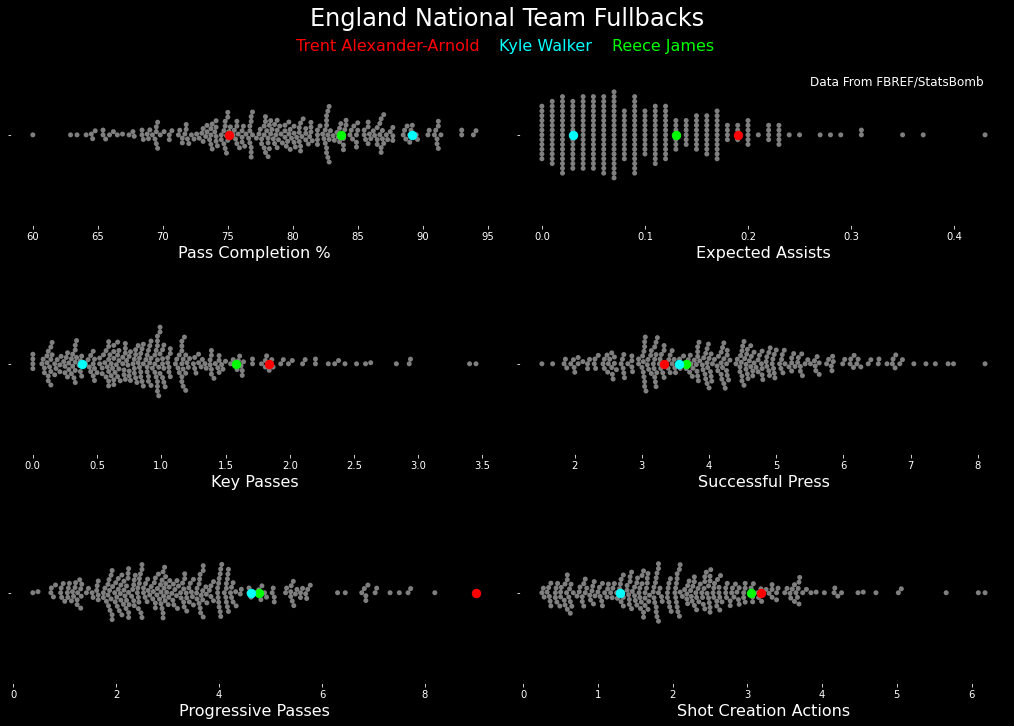

In [68]:
#creating the plot

background = 'black'
text_color = 'white'


fig, axes = plt.subplots(3,2,figsize=(14,10),constrained_layout=True)
fig.set_facecolor(background)
fig.suptitle('England National Team Fullbacks', fontsize=24, color='white')
HighlightText(x=0.29, y=0.95,
              fontsize=16,
              s='<Trent Alexander-Arnold> v <Kyle Walker> v <Reece James>',
              highlight_textprops=[{"color": 'red'},
                                   {"color": 'cyan'},
                                   {"color": 'lime'}],
              annotationbbox_kw={'boxcoords': fig.transFigure})
HighlightText(x=0.8, y=0.9,
              fontsize=12,
              s='<Data From FBREF/StatsBomb>',
              highlight_textprops=[{"color": 'white'}],
              annotationbbox_kw={'boxcoords': fig.transFigure})
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0.2 , wspace=0.2)

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

counter = 0
counter2 = 0
met_counter = 0

#create initial for loop
for i, ax in zip(df['Player'],axes.flatten()):
    ax.set_facecolor(background)
    x_label_names={'Pass Completion','Expected Assists','Key Passes','Press Success','Tacklet + Interceptions',
                  'Shot Creation Actions'}
    sns.swarmplot(x=metrics[met_counter],data=df, ax=axes[counter,counter2],color='white',zorder=1,alpha=0.5)
    ax.set_xlabel(f'{metrics[met_counter]}',c=text_color, size=16)
    
    
    for x in range(len(df['Player'])):
        if df['Player'][x] == 'Trent Alexander-Arnold':
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=70,c='red',zorder=2,label='Trent')
        if df['Player'][x] == 'Kyle Walker':
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=70,c='cyan',zorder=2,label='Walker')
        if df['Player'][x] == 'Reece James':
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=70,c='lime',zorder=2,label='James')
    
    
    
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1
        
plt.show()

In [69]:
fig.savefig('Eng_fullbacks.png')

,index,Rk,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,...,Clr,Err,SCA,SCA.1,SCA Types,SCA Types.1,GCA,GCA.1,GCA Types,GCA Types.1
0,0,1.0,Patrick van Aanholt,nl NED,DF,Crystal Palace,18.7,45.6,57.4,79.4,...,1.98,0.05,SCA,SCA90,SCAPassLive,SCAPassDead,GCA,GCA90,GCAPassLive,GCAPassDead
1,1,2.0,Tammy Abraham,eng ENG,FW,Chelsea,11.3,13.0,19.0,68.4,...,1.33,0.00,1.39,1.39,1.18,0.16,0.16,0.16,0.11,0.05
2,2,3.0,Che Adams,sco SCO,FW,Southampton,24.3,14.7,21.2,69.4,...,0.53,0.04,1.59,1.59,0.97,0,0.18,0.18,0.09,0
3,3,4.0,Tosin Adarabioyo,eng ENG,DF,Fulham,27.0,46.6,53.8,86.5,...,7.56,0.04,2.06,2.06,1.48,0,0.25,0.25,0.21,0
4,6,7.0,Ola Aina,ng NGA,DF,Fulham,26.9,46.1,59.3,77.8,...,4.42,0.00,1.43,1.44,1.19,0,0,0,0,0
5,7,8.0,Rayan Aït Nouri,fr FRA,DF,Wolves,9.8,40.6,48.3,84.1,...,2.65,0.00,0.89,0.89,0.82,0.04,0.15,0.15,0.15,0
6,8,9.0,Semi Ajayi,ng NGA,DF,West Brom,24.4,24.5,33.2,73.6,...,4.71,0.04,1.53,1.53,1.12,0.1,0.1,0.1,0.1,0
7,10,11.0,Marc Albrighton,eng ENG,FWDF,Leicester City,15.0,30.7,45.3,67.8,...,1.27,0.00,0.51,0.51,0.34,0,0,0,0,0
8,11,12.0,Thiago Alcántara,es ESP,MF,Liverpool,13.8,74.3,83.5,89.1,...,1.01,0.00,3.67,3.67,2.73,0.2,0.6,0.6,0.4,0.07
9,12,13.0,Toby Alderweireld,be BEL,DF,Tottenham,17.9,43.4,52.5,82.6,...,7.21,0.00,2.61,2.62,2.17,0.14,0,0,0,0


,index,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,...,Clr,Err,SCA,SCA.1,SCA Types,SCA Types.1,GCA,GCA.1,GCA Types,GCA Types.1
0,0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,18.7,45.6,57.4,79.4,763.5,...,1.98,0.05,SCA,SCA90,SCAPassLive,SCAPassDead,GCA,GCA90,GCAPassLive,GCAPassDead
1,1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,11.3,13.0,19.0,68.4,181.0,...,1.33,0.00,1.39,1.39,1.18,0.16,0.16,0.16,0.11,0.05
2,2,Che Adams\Che-Adams,sco SCO,FW,Southampton,24.3,14.7,21.2,69.4,239.8,...,0.53,0.04,1.59,1.59,0.97,0,0.18,0.18,0.09,0
3,3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,27.0,46.6,53.8,86.5,1106.2,...,7.56,0.04,2.06,2.06,1.48,0,0.25,0.25,0.21,0
4,6,Ola Aina\Ola-Aina,ng NGA,DF,Fulham,26.9,46.1,59.3,77.8,890.3,...,4.42,0.00,1.43,1.44,1.19,0,0,0,0,0
5,7,Rayan Aït Nouri\Rayan-Ait-Nouri,fr FRA,DF,Wolves,9.8,40.6,48.3,84.1,659.8,...,2.65,0.00,0.89,0.89,0.82,0.04,0.15,0.15,0.15,0
6,8,Semi Ajayi\Semi-Ajayi,ng NGA,DF,West Brom,24.4,24.5,33.2,73.6,532.6,...,4.71,0.04,1.53,1.53,1.12,0.1,0.1,0.1,0.1,0
7,10,Marc Albrighton\Marc-Albrighton,eng ENG,FWDF,Leicester City,15.0,30.7,45.3,67.8,539.1,...,1.27,0.00,0.51,0.51,0.34,0,0,0,0,0
8,11,Thiago Alcántara\Thiago-Alcantara,es ESP,MF,Liverpool,13.8,74.3,83.5,89.1,1562.5,...,1.01,0.00,3.67,3.67,2.73,0.2,0.6,0.6,0.4,0.07
9,12,Toby Alderweireld\Toby-Alderweireld,be BEL,DF,Tottenham,17.9,43.4,52.5,82.6,1020.8,...,7.21,0.00,2.61,2.62,2.17,0.14,0,0,0,0
